In [4]:
import numpy as np
import random


ADJACENT_P_DELAY = 1 #IN MICRO SECOND
TIME_TO_SEND_512 = 5.12 #LINK RATE = 100Mbps
NUMER_OF_NODEs = 10

SIMULATION_TIME = 3 #IN second
TIME_TO_SEND_PACKET = 10 # size of each packet = 1000 bit
RATES = np.array([2000])# ach node's packet's generation rate is choose from this list 
#, 2000, 2500, 12500, 10000, 2500, 1000, 10600, 14250

class Device:
    def __init__(self, name, position):
        self.name = name
        self.position = position
        self.rate = random.choice(1/RATES)
        self.time = np.random.exponential(scale=self.rate)*1000000
        self.k = 0
        self.p_num = 0
        
    def show_info(self):
        print(f"name: {self.name} ****** rate: {self.rate} ******* sent packet number: {self.time}")
        
    def next_time(self):
        return np.random.exponential(scale=np.random.exponential(scale=self.rate))*1000000
    
      

ar_c=0
success_arr = np.zeros(NUMER_OF_NODEs)
fail_arr = np.zeros(NUMER_OF_NODEs)
for node in range(2,NUMER_OF_NODEs + 1):
    NUM_OF_NODE = node
    devices = []
    for i in range(NUM_OF_NODE):
        devices.append(Device("D" + str(i), i*3))


    success = 0
    fail = 0
    
    TIME = 0
    t=0
    while(TIME <= SIMULATION_TIME * 1000000):

        times = []
        for i in devices:
           times.append(i.time) #a starting time assigns to each node(in micro second)

        b = np.argsort(times)# an b array whichever element that is one  
        #print(f"step {t} *************{times[b[0]] }******************")
        TIME = times[b[0]]


        #Detect Collission


        if times[b[1]] - times[b[0]] <=  abs(b[1] - b[0]) * ADJACENT_P_DELAY :# if propagation time was grater than the 
            #time difference in which second node starts to share a packet then a collision uccurs and this if statement detect it
            devices[b[0]].k += 1
            devices[b[1]].k += 1
            devices[b[0]].time += (abs(b[1] - b[0]) + np.random.choice(2** devices[b[0]].k)*TIME_TO_SEND_512)
            devices[b[1]].time += (abs(b[1] - b[0]) + np.random.choice(2** devices[b[1]].k)*TIME_TO_SEND_512)
            fail += 1
        else:
            for i in range(1, NUM_OF_NODE):
                if devices[b[i]].time -  devices[b[0]].time <= TIME_TO_SEND_PACKET:
                    devices[b[i]].time = devices[b[0]].time + TIME_TO_SEND_PACKET
            devices[b[0]].time += (devices[b[0]].next_time() + TIME_TO_SEND_PACKET)

            devices[b[0]].k = 0
            success += 1
            devices[b[0]].p_num += 1

        #for i in devices:
        #   print(f"k = {i.k}     time = {i.time}   name={i.name}")
        #print("***********************")    
        t += 1        
    success_arr[ar_c] = success
    fail_arr[ar_c] = fail
    ar_c += 1

    #print("fail:",fail_arr)
    #print("success",success_arr)    
    #for i in devices:
    #     i.show_info()




In [5]:
x_ax = list(range(1,NUMER_OF_NODEs + 1))
a = np.array(fail_arr)
b= np.array(success_arr)
accuracy = b/(b+a)


C:\Users\mehr\AppData\Local\Temp\ipykernel_11832\2144026968.py:4: RuntimeWarning: invalid value encountered in divide
  accuracy = b/(b+a)


Text(0, 0.5, 'efficiency')

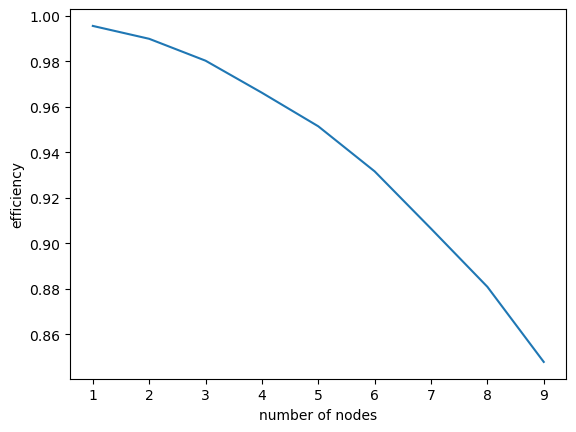

In [6]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.plot(x_ax,accuracy)

ax.set_xlabel("number of nodes")
ax.set_ylabel("efficiency")



In [74]:
np.random.exponential(scale=1/1002)*1000000

902.8771545232271